In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **ML Algorithms: LR, RF, DT, NB, SVM, GB, MLP, KNN, XGBoost**

### **Import Libraries**

In [2]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/cardio_train.csv', sep=';')

In [4]:
df.shape

(70000, 13)

In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['age'] = (df['age'] / 365).round().astype('int')
df['age']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [10]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# remove id
df=df.drop("id",axis=1)

In [12]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1


In [13]:
df.shape

(70000, 12)

In [ ]:
#convert age from days to years
# def days_to_years(days):
#     return days / 365.25

# df['age'] = df['age'].apply(days_to_years)

**Info Of Dataset**

In [14]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [15]:
df.duplicated().values.any()

True

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(66184, 12)

In [18]:
correlation=df.corr()
correlation

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023792,-0.083605,0.051836,0.020675,0.017589,0.156019,0.098916,-0.050144,-0.031596,-0.009399,0.234270
gender,-0.023792,1.000000,0.504363,0.149134,0.005159,0.014065,-0.044587,-0.026668,0.340583,0.170933,0.009320,0.001365
height,-0.083605,0.504363,1.000000,0.291809,0.005646,0.006337,-0.049736,-0.018080,0.190518,0.095972,-0.006445,-0.009298
weight,0.051836,0.149134,0.291809,1.000000,0.029490,0.041835,0.132124,0.099856,0.061179,0.062168,-0.010875,0.174474
ap_hi,0.020675,0.005159,0.005646,0.029490,1.000000,0.015771,0.022368,0.010762,-0.001831,0.000674,0.000835,0.053770
ap_lo,0.017589,0.014065,0.006337,0.041835,0.015771,1.000000,0.021686,0.009023,0.003731,0.009437,0.006278,0.064759
cholesterol,0.156019,-0.044587,-0.049736,0.132124,0.022368,0.021686,1.000000,0.443462,0.002487,0.029740,0.019443,0.213036
gluc,0.098916,-0.026668,-0.018080,0.099856,0.010762,0.009023,0.443462,1.000000,-0.010642,0.006645,0.000582,0.080470
smoke,-0.050144,0.340583,0.190518,0.061179,-0.001831,0.003731,0.002487,-0.010642,1.000000,0.337553,0.030539,-0.023715
alco,-0.031596,0.170933,0.095972,0.062168,0.000674,0.009437,0.029740,0.006645,0.337553,1.000000,0.029440,-0.014259


<Axes: >

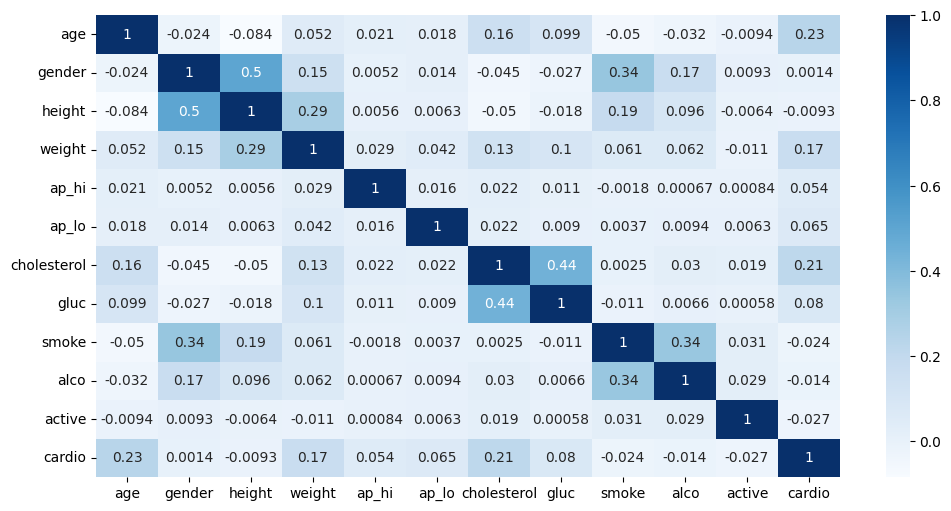

In [19]:
#heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation, cmap="Blues", annot=True)

In [ ]:
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# # Generate a mask for the upper triangle
# mask = np.zeros_like(correlation, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(12, 9))
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5});

Text(0.5, 1.0, 'Correlation of numerical attributes with cardio')

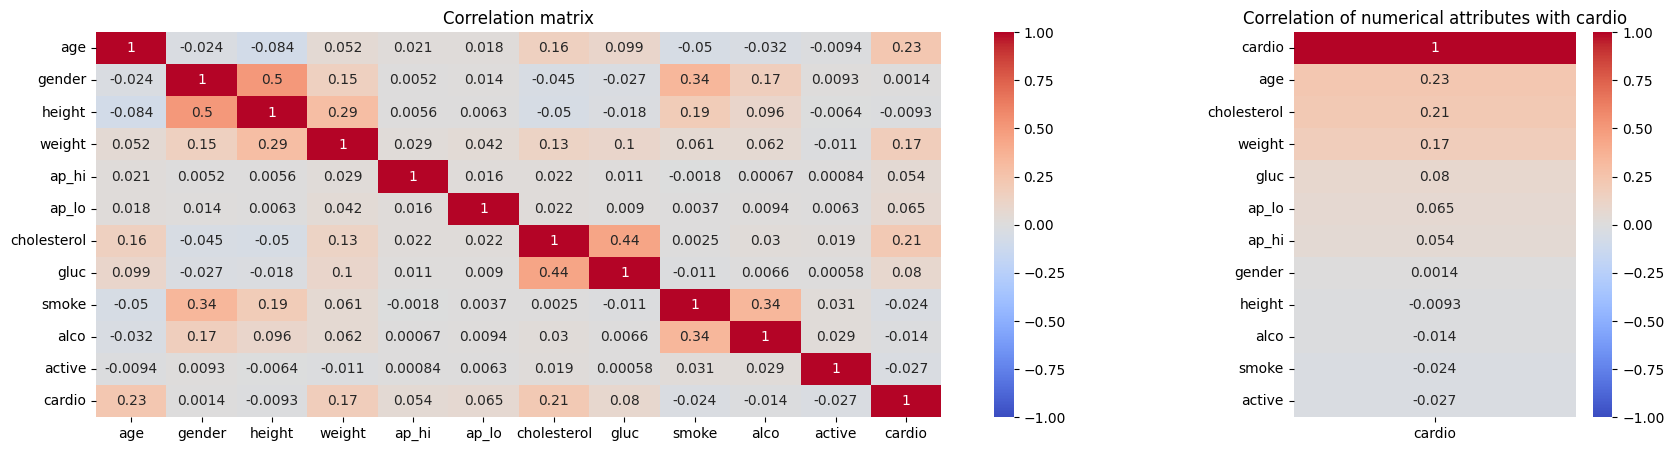

In [20]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=df.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True,cmap='coolwarm', ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=df.corr(method="pearson", numeric_only=True)[["cardio"]].sort_values('cardio', ascending=False), vmin=-1, vmax=1, annot=True,cmap='coolwarm', ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with cardio")

In [21]:
# 1 - women, 2 - men

gender_variable = 'gender'

# Calculate the number of male patients
male_patients = df[df[gender_variable] == 2].shape[0]
female_patients = df[df[gender_variable] == 1].shape[0]
print(f'Number of male patients: {male_patients}')
print(f'Number of female patients: {female_patients}')


target_variable = 'cardio'
healthy_patients = df[df[target_variable] == 0].shape[0]
print(f'Number of healthy patients: {healthy_patients}')
disease = 66184 - healthy_patients
print(f'Number of unhealhty: {disease}')



# Calculate the number of male healthy patients
male_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 2)].shape[0]
print(f'Number of male healthy patients: {male_healthy_patients}')

# Calculate the number of female healthy patients
female_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 1)].shape[0]
print(f'Number of female healthy patients: {female_healthy_patients}')


# Unhealthy patient male
male_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 2)].shape[0]
print(f'Male unhealthy (having heart disease) patients: {male_unhealthy_patients}')


# Calculate the number of female unhealthy patients
female_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 1)].shape[0]
print(f'Female unhealthy (having heart disease) patients: {female_unhealthy_patients}')

Number of male patients: 23643
Number of female patients: 42541
Number of healthy patients: 32191
Number of unhealhty: 33993
Number of male healthy patients: 11478
Number of female healthy patients: 20713
Male unhealthy (having heart disease) patients: 12165
Female unhealthy (having heart disease) patients: 21828


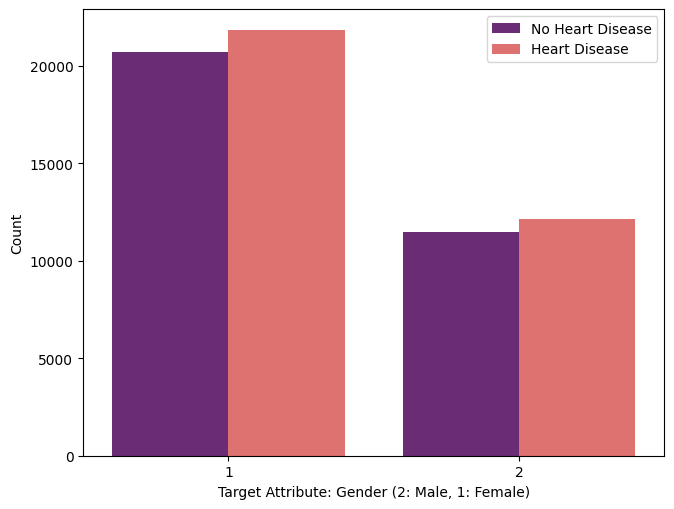

In [22]:
target_variable = 'cardio'

# Assuming the gender variable is named 'gender' where 1 represents male
gender_variable = 'gender'

# Create a count plot to visualize the distribution of individuals with and without heart disease based on gender
plt.figure(figsize=(7.5, 5.8))
sns.countplot(x=gender_variable, hue=target_variable, data=df, palette='magma')
plt.xlabel('Target Attribute: Gender (2: Male, 1: Female)')
plt.ylabel('Count')
plt.legend( labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In [23]:
# normal attribute and class attribute feature alada korar jonno
X=df.drop(columns='cardio',axis=1)
Y=df['cardio']

In [24]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,52,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,48,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1
69996,62,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [25]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 66184, dtype: int64

In [ ]:
# scaler = MinMaxScaler()

# X = scaler.fit_transform(X)

In [ ]:
# X

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
x = pd.DataFrame(scaler, columns=X.columns)
x.describe().T.style.background_gradient(axis=0, cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,66184.000000,0.667577,0.194506,0.000000,0.514286,0.685714,0.828571,1.000000
gender,66184.000000,0.357231,0.479187,0.000000,0.000000,0.000000,1.000000,1.000000
height,66184.000000,0.560744,0.042840,0.000000,0.533333,0.564103,0.589744,1.000000
weight,66184.000000,0.339890,0.076912,0.000000,0.289474,0.326316,0.384211,1.000000
ap_hi,66184.000000,0.017273,0.009794,0.000000,0.016698,0.016698,0.017934,1.000000
ap_lo,66184.000000,0.015141,0.017505,0.000000,0.013550,0.013550,0.014453,1.000000
cholesterol,66184.000000,0.192992,0.346115,0.000000,0.000000,0.000000,0.500000,1.000000
gluc,66184.000000,0.119085,0.292069,0.000000,0.000000,0.000000,0.000000,1.000000
smoke,66184.000000,0.092772,0.290114,0.000000,0.000000,0.000000,0.000000,1.000000
alco,66184.000000,0.056751,0.231368,0.000000,0.000000,0.000000,0.000000,1.000000


## Splitting a dataset into 90% training and 10% testing sets

In [27]:
# One will use for train and one will use for testing
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.1, random_state=0, stratify=Y)

In [30]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [31]:
y_train.value_counts()

cardio
1    30593
0    28972
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(random_state=0)

x_train, y_train = smote.fit_resample(x_train,y_train)
x_test, y_test = smote.fit_resample(x_test,y_test)

In [34]:
y_train.value_counts()

cardio
1    30593
0    30593
Name: count, dtype: int64

**RF**

In [35]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [ ]:
rf_pred = rf_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.7369117647058824
Random Forest Precision: 0.7772805507745266
Random Forest Recall: 0.6641176470588235
Random Forest F1 Score: 0.7162569389373512
Random Forest Confusion Matrix: [[2753  647]
 [1142 2258]]


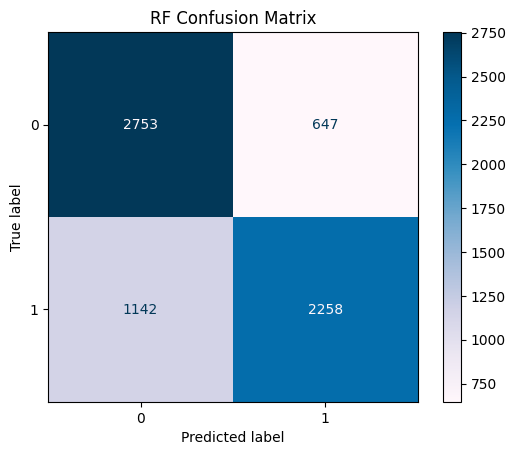

In [ ]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

## Different parameters

## n_estimator 100, 400, 1000 (target)

In [ ]:
# parameters = {
#     'n_estimators' : [50, 150, 500],
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_features' : ['sqrt', 'log2'],
#     'random_state': [0]
# }

# rf1 = RandomForestClassifier(n_jobs=-1)
# rf_cv = GridSearchCV(estimator=rf1, cv=3, param_grid=parameters).fit(x_train, y_train)

In [ ]:
# y_pred_rf = rf_cv.predict(x_test)

In [ ]:
# print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))
# print("Random Forest Precision:",precision_score(y_test, y_pred_rf))
# print("Random Forest Recall:",recall_score(y_test, y_pred_rf))
# print("Random Forest F1 Score:",f1_score(y_test, y_pred_rf))
# print("Random Forest Confusion Matrix:",confusion_matrix(y_test, y_pred_rf))

**DT**

In [ ]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
dc_pred = dc_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.7320588235294118
Decision Tree Precision: 0.7571707953063885
Decision Tree Recall: 0.683235294117647
Decision Tree F1 Score: 0.7183055040197898
Decision Tree Confusion Matrix: [[2655  745]
 [1077 2323]]


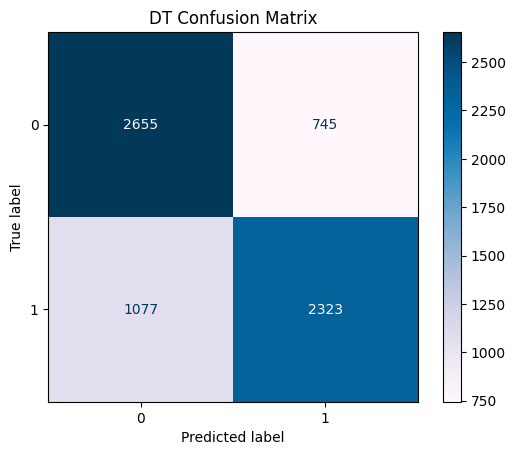

In [ ]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

## Different parameters

In [ ]:
# parameters = {
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'splitter' : ['best', 'random'],
#     'max_depth' : list(np.arange(4, 30, 1))
#         }

# tree = DecisionTreeClassifier()
# tree_cv = GridSearchCV(estimator=tree, cv=3, param_grid=parameters).fit(x_train, y_train)

In [ ]:
# tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(x_train, y_train)

In [ ]:
# y_pred_tree = tree.predict(x_test)

In [ ]:
# print("Decision Tree Accuracy:", accuracy_score(y_test,y_pred_tree))
# print("Decision Tree Precision:",precision_score(y_test,y_pred_tree))
# print("Decision Tree Recall:",recall_score(y_test,y_pred_tree))
# print("Decision Tree F1 Score:",f1_score(y_test,y_pred_tree))
# print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,y_pred_tree))

In [ ]:
# y_pred_tree2 = tree.predict(x_train)

In [ ]:
# print("Decision Tree Accuracy:", accuracy_score(y_train, y_pred_tree2))
# print("Decision Tree Precision:",precision_score(y_train, y_pred_tree2))
# print("Decision Tree Recall:",recall_score(y_train, y_pred_tree2))
# print("Decision Tree F1 Score:",f1_score(y_train, y_pred_tree2))
# print("Decision Tree Confusion Matrix:", confusion_matrix(y_train, y_pred_tree2))

**NB**

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred = nb_clf.predict(x_test)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:", precision_score(y_test,nb_pred))
print("Naive Bayes Recall:", recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:", f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:", confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.5936764705882352
Naive Bayes Precision: 0.7340191036002939
Naive Bayes Recall: 0.2938235294117647
Naive Bayes F1 Score: 0.4196597353497165
Naive Bayes Confusion Matrix: [[3038  362]
 [2401  999]]


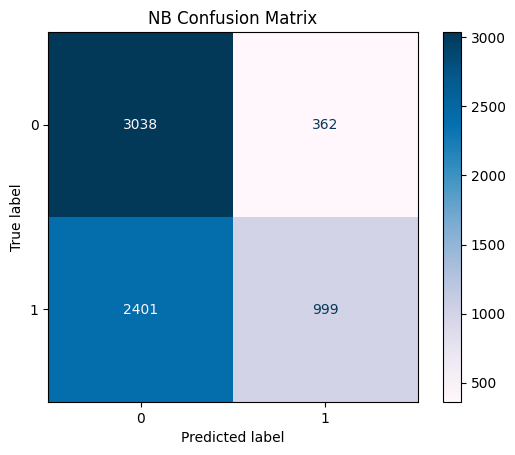

In [ ]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

**Logistic Regression**



#KYC


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train,y_train)

In [ ]:
# ans=model.predict(x_train)
# accuracy=accuracy_score(ans,y_train)
# precision=precision_score(ans,y_train)
# recall=recall_score(ans,y_train)
# f1=f1_score(ans,y_train)

In [ ]:
# print("Training Accuracy is ",accuracy)
# print("Training Precisiom is ",precision)
# print("Training recall is ",recall)
# print("Training F1 is ",f1)

In [ ]:
anss=model.predict(x_test)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ", accuracy_test_lr)
print("Testing Precision is ", precision_test_lr)
print("Testing recall is ", recall_test_lr)
print("Testing F1 is ", f1_test_lr)
print("LR Confusion Matrix:", confusion_matrix(anss,y_test))

# print("LR Accuracy:",accuracy_score(y_test,anss))
# print("LR Precision:",precision_score(y_test,anss))
# print("LR Recall:",recall_score(y_test,anss))
# print("LR F1 Score:",f1_score(y_test,anss))
# print("LR Confusion Matrix:",confusion_matrix(y_test,anss))

In [ ]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## Diff parameters

In [ ]:
# # Dictionary to define parameters to test in algorithm
# parameters = {
#     'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
#     'class_weight' : ['balanced'],
#     'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# }

# lr = LogisticRegression()
# lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=3).fit(x_train, y_train)

In [ ]:
# lr = LogisticRegression(**lr_cv.best_params_).fit(x_train, y_train)

In [ ]:
# y_pred_lr = lr.predict(x_test)

In [ ]:
# print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
# print("LR Precision:",precision_score(y_test, y_pred_lr))
# print("LR Recall:",recall_score(y_test, y_pred_lr))
# print("LR F1 Score:",f1_score(y_test, y_pred_lr))
# print("LR Confusion Matrix:", confusion_matrix(y_test, y_pred_lr))

**XGBoost**

In [ ]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train, y_train)

In [ ]:
# acc = model2.predict(x_train)
# accuracy_xgb=accuracy_score(acc,y_train)
# precision_xgb=precision_score(acc,y_train)
# recall_xgb=recall_score(acc,y_train)
# f1_xgb=f1_score(acc,y_train)

# print("Training Accuracy is ",accuracy_xgb)
# print("Training Precision is ",precision_xgb)
# print("Training recall is ",recall_xgb)
# print("Training F1 is ",f1_xgb)

In [ ]:
acc2 = model2.predict(x_test)

In [ ]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))
class_report = classification_report(acc2, y_test)
print("Classification Report:")
print(class_report)

# print("xgb Accuracy:",accuracy_score(y_test,acc2))
# print("xgb Precision:",precision_score(y_test,acc2))
# print("xgb Recall:",recall_score(y_test,acc2))
# print("xgb F1 Score:",f1_score(y_test,acc2))
# print("xgb Confusion Matrix:",confusion_matrix(y_test,acc2))

In [ ]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

# **XGB Using GridSearchCV**

In [ ]:
xgb = xgb.XGBClassifier(random_state=0)
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)

# MLPClassifier

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train, y_train)

In [ ]:
# y_pred = model3.predict(x_train)
# acc_mlp  = accuracy_score(y_pred,y_train)
# precision_mlp=precision_score(y_pred,y_train)
# recall_mlp=recall_score(y_pred,y_train)
# f1_mlp=f1_score(y_pred,y_train)
# print("Traing Accuracy is ",acc_mlp)
# print("Traing Precision is ",precision_mlp)
# print("Traing recall is ",recall_mlp)
# print("Traing F1 is ",f1_mlp)

In [ ]:
y_pred_t = model3.predict(x_test)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)

In [ ]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Mlp Confusion Matrix')
plt.show()

**SVM**



# KYC

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2, probability=True)
classifier.fit(x_train,y_train)

Y_predict = classifier.predict(x_test)

In [ ]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# **Diff Parameter**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# parameters = {
#     'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
#     'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
# }

# svc = SVC()
# svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=3).fit(x_train, y_train)

In [ ]:
# svc = SVC(**svc_cv.best_params_).fit(x_train, y_train)

In [ ]:
# y_pred_svc = svc.predict(x_test)

In [ ]:
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
# print("SVM Precision:", precision_score(y_test ,y_pred_svc))
# print("SVM Forest Recall:", recall_score(y_test, y_pred_svc))
# print("SVM Forest F1 Score:", f1_score(y_test, y_pred_svc))
# print("SVM Confusion Matrix:", confusion_matrix(y_test, y_pred_svc))

# KNN


In [ ]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

In [ ]:
# when k = 6

knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
# When k= 7

knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)
#prediction
Y_pred = knn_classifier.predict(x_test)
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
#When k= 8


knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

#check accuracy

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
# When k = 9


knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

In [ ]:
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# KNN uisng GridSearchCV

In [ ]:
# parameters = {
#     'n_neighbors' : list(np.arange(3, 50, 2)),
#     'weights': ['uniform', 'distance'],
#     'p' : [1, 2, 3, 4, 5, 6]
# }

# knn = KNeighborsClassifier()
# knn_cv = GridSearchCV(estimator=knn, cv=3, param_grid=parameters).fit(x_train, y_train)

In [ ]:
# knn = KNeighborsClassifier(**knn_cv.best_params_).fit(x_train, y_train)

In [ ]:
# y_pred_knn = knn.predict(x_test)

In [ ]:
# print("KNN Accuracy:",accuracy_score(y_test, y_pred_knn))
# print("KNN Precision:",precision_score(y_test, y_pred_knn))
# print("KNN Forest Recall:",recall_score(y_test, y_pred_knn))
# print("KNN Forest F1 Score:",f1_score(y_test, y_pred_knn))

**GB Classifier implementation**

In [ ]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train, y_train)

In [ ]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test)

In [ ]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_predk),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)
                                                                                 ]})


In [ ]:
final_data

In [ ]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f'RF AUC: {auc_roc_rf}')

In [ ]:
# Make predictions on the test set

y_pred_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
y_pred_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
y_pred_prob_lr = model.predict_proba(x_test)[:, 1]
y_pred_prob_xgb = model2.predict_proba(x_test)[:, 1]
y_pred_prob_mlp = model3.predict_proba(x_test)[:, 1]
y_pred_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
y_pred_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC score

auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_roc_nb = roc_auc_score(y_test, y_pred_prob_nb)
auc_roc_LR = roc_auc_score(y_test, y_pred_prob_lr)
auc_roc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
auc_roc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
auc_roc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_roc_gb = roc_auc_score(y_test, y_pred_prob_gb)


print(f'DT AUC: {auc_roc_dt}')
print(f'NB AUC: {auc_roc_nb}')
print(f'LR AUC: {auc_roc_LR}')
print(f'XGB AUC: {auc_roc_xgb}')
print(f'MLP AUC: {auc_roc_mlp}')
print(f'KNN AUC: {auc_roc_knn}')
print(f'GB AUC: {auc_roc_gb}')


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_pred_prob_svm = classifier.predict_proba(x_test)[:, 1]
auc_roc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'SVM AUC: {auc_roc_svm}')

# **ROC Curve**

In [ ]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# RF
# y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
# roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(roc_auc_mlp))
